#### Setting up API Information

In [3]:
username = 'OOIAPI-BI8MMX3Y14S4FL'
token = 'TEMP-TOKEN-MK0PEMRS0CFA8Z'

In [4]:
import requests
import time

#### Find and request data

In [5]:
subsite = 'RS03ASHS'
node = 'MJ03B'
sensor = '07-TMPSFA301'
method = 'streamed'
stream = 'tmpsf_sample'
beginDT = '2014-09-27T01:01:01.000Z' #begin of first deployement
endDT = '2019-09-01T01:01:01.000Z'

In [6]:
base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,   
}

In [7]:
r = requests.get(data_request_url, params=params, auth=(username, token))
data = r.json()

In [8]:
print(data['allURLs'][0])

https://opendap.oceanobservatories.org/thredds/catalog/ooi/jazlynnatalie12@gmail.com/20190930T202317562Z-RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_sample/catalog.html


#### Load the dataset into the notebook

In [9]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/jazlynnatalie12@gmail.com/20190915T214957126Z-RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_sample/catalog.html'

In [10]:
import re
import xarray as xr
import pandas as pd
import os
import netCDF4

In [11]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
# datasets = [os.path.join(tds_url, i) for i in x]
datasets = [os.path.join(tds_url, i + "#fillmismatch") for i in x]
# datasets = [os.path.join(tds_url, x.id + "#fillmismatch") for x in c.datasets]

In [12]:
datasets 

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jazlynnatalie12@gmail.com/20190915T214957126Z-RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_sample/deployment0003_RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_sample_20190311T000003.226170-20190901T010055.420595.nc#fillmismatch',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jazlynnatalie12@gmail.com/20190915T214957126Z-RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_sample/deployment0003_RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_sample_20170815T003130.804600-20190310T235953.225901.nc#fillmismatch',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jazlynnatalie12@gmail.com/20190915T214957126Z-RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_sample/deployment0001_RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_sample_20160815T000001.376964-20170813T232226.349596.nc#fillmismatch',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/jazlynnatalie12@gmail.com/20190915T214957126Z-RS03ASHS-MJ03B-07-TMPSFA301-streamed-tmpsf_

##### Use xarray to open all netcdf files as a single xarray dataset, swap the dimension from obs to time and and examine the content.

In [13]:
# Note this may take a while
ds = xr.open_mfdataset(datasets)
# ds = [os.path.join(tds_url, datasets.id + "#fillmismatch") for x in .datasets]

# datasets = [os.path.join(tds_url, x.id + "#fillmismatch") for x in c.datasets]
# ds = ds.swap_dims({'obs': 'time'})
# ds = ds.chunk({'time': 100})
# ds

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [14]:
ds

<xarray.Dataset>
Dimensions:                    (obs: 15401155)
Coordinates:
  * obs                        (obs) int64 0 1 2 3 ... 4975996 4975997 4975998
    time                       (obs) datetime64[ns] dask.array<shape=(15401155,), chunksize=(1458276,)>
    lat                        (obs) float64 dask.array<shape=(15401155,), chunksize=(1458276,)>
    lon                        (obs) float64 dask.array<shape=(15401155,), chunksize=(1458276,)>
Data variables:
    deployment                 (obs) int32 dask.array<shape=(15401155,), chunksize=(1458276,)>
    id                         (obs) |S64 dask.array<shape=(15401155,), chunksize=(1458276,)>
    battery_voltage            (obs) float32 dask.array<shape=(15401155,), chunksize=(1458276,)>
    driver_timestamp           (obs) datetime64[ns] dask.array<shape=(15401155,), chunksize=(1458276,)>
    ingestion_timestamp        (obs) datetime64[ns] dask.array<shape=(15401155,), chunksize=(1458276,)>
    internal_timestamp         (obs)

In [15]:
ds = ds.swap_dims({'obs': 'time'})
# ds = ds.chunk({'time': 100})
ds

<xarray.Dataset>
Dimensions:                    (time: 15401155)
Coordinates:
    obs                        (time) int64 0 1 2 3 ... 4975996 4975997 4975998
  * time                       (time) datetime64[ns] 2019-03-11T00:00:03.226169344 ... 2016-08-14T23:59:49.375991808
    lat                        (time) float64 dask.array<shape=(15401155,), chunksize=(1458276,)>
    lon                        (time) float64 dask.array<shape=(15401155,), chunksize=(1458276,)>
Data variables:
    deployment                 (time) int32 dask.array<shape=(15401155,), chunksize=(1458276,)>
    id                         (time) |S64 dask.array<shape=(15401155,), chunksize=(1458276,)>
    battery_voltage            (time) float32 dask.array<shape=(15401155,), chunksize=(1458276,)>
    driver_timestamp           (time) datetime64[ns] dask.array<shape=(15401155,), chunksize=(1458276,)>
    ingestion_timestamp        (time) datetime64[ns] dask.array<shape=(15401155,), chunksize=(1458276,)>
    internal_t

In [16]:
# ds = ds.chunk({'time': 100})
# ds

#### Explore the dataset

In [17]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


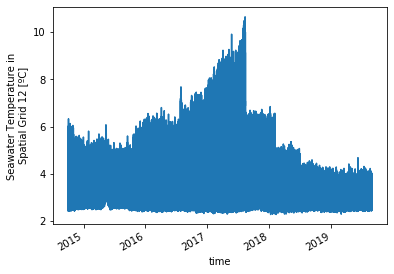

<Figure size 432x288 with 0 Axes>

In [18]:
# Given the amount of data, this may take a while to plot
# use datashader and hvplot
ds['temperature12'].plot()
plt.show();
plt.savefig('/home/jovyan/botpt/figures/tmpsf_12.png')

In [19]:
# ds.to_dataframe()
ds12 = ds['temperature12'].to_dataframe()
ds12.head()

obs       lat        lon  temperature12
time                                                                  
2019-03-11 00:00:03.226169344    0  45.93362 -130.01368         2.6720
2019-03-11 00:00:13.225899520    1  45.93362 -130.01368         2.6633
2019-03-11 00:00:23.227246592    2  45.93362 -130.01368         2.6548
2019-03-11 00:00:33.224725504    3  45.93362 -130.01368         2.6505
2019-03-11 00:00:43.224651776    4  45.93362 -130.01368         2.6463

In [22]:
ds01 = ds['temperature01'].to_dataframe()
ds01.head()

obs       lat        lon  temperature01
time                                                                  
2019-03-11 00:00:03.226169344    0  45.93362 -130.01368         4.6752
2019-03-11 00:00:13.225899520    1  45.93362 -130.01368         4.6706
2019-03-11 00:00:23.227246592    2  45.93362 -130.01368         4.6272
2019-03-11 00:00:33.224725504    3  45.93362 -130.01368         4.5564
2019-03-11 00:00:43.224651776    4  45.93362 -130.01368         4.4725

In [24]:
ds05 = ds['temperature05'].to_dataframe()
ds05.head()

obs       lat        lon  temperature05
time                                                                  
2019-03-11 00:00:03.226169344    0  45.93362 -130.01368         4.3505
2019-03-11 00:00:13.225899520    1  45.93362 -130.01368         4.4149
2019-03-11 00:00:23.227246592    2  45.93362 -130.01368         4.4782
2019-03-11 00:00:33.224725504    3  45.93362 -130.01368         4.5338
2019-03-11 00:00:43.224651776    4  45.93362 -130.01368         4.5892

In [20]:
# Plotting with hvplot 
import hvplot.pandas

In [21]:
ds12['temperature12'].hvplot(datashade=True)

:DynamicMap   []
   :RGB   [time,temperature12]   (R,G,B,A)

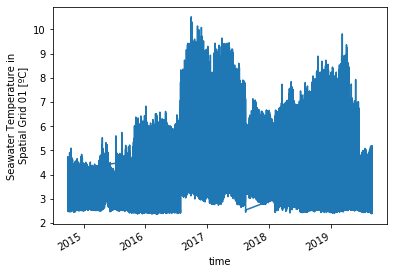

<Figure size 432x288 with 0 Axes>

In [17]:
ds['temperature01'].plot()
plt.show();
plt.savefig('/home/jovyan/botpt/figures/tmpsf_01.png')

In [23]:
ds01['temperature01'].hvplot(datashade=True)

:DynamicMap   []
   :RGB   [time,temperature01]   (R,G,B,A)

In [26]:
ds05['temperature05'].hvplot(datashade=True)

:DynamicMap   []
   :RGB   [time,temperature05]   (R,G,B,A)